# 課題
今回は、以下のような状況のおいて、重回帰分析を用いて価格の予測を行います。

米ボストンに､とある不動産仲介の会社がありました｡   
現在この会社は､自社サイトのトップページに最新のお買い得物件を表示する機能を追加することを検討しています｡  
この機能を自動化できれば､自社サイトへの人の流入が増えると考えたのです｡   
そして､そのためには各住宅の相場価格を回帰分析によって見積もることが必要になりました｡例えば､相場価格を算出することができれば､実際価格との比を取って､割高度を求めることができます｡   
この値が1より大きいほどその物件は割高で､1より小さいほど割安という意味の評価指標になります｡  
この会社は､自社に貯まっていたボストン市の各区画の住宅価格データを利用して､このシステムを構築することにしました｡
    

# データの読み込み
### Bostonデータセット  
**sklearn.datasets**  
今回は､scikit-learnに収録されているBoston市郊外の住宅価格データセットを利用します｡  
scikit-learnには､手元に分析できるデータがない人でも機械学習を試せるよう､サンプルとなる小規模なデータセットが多数収録されています｡   sklearn.datasetsからアクセスでき､住宅価格予測の他にも乳がんの判定､アヤメの花の品種分類､手書き数字の画像分類などのデータが収録されています｡     

### データの概観  
Bostonデータセットは､住宅価格を重回帰分析で予測するためのデータセットです｡   
ボストン郊外居住区画ごとに犯罪件数や､空気汚染の度合い､あるいは住民人数における肉体労働者の割合などの13種類の説明変数と､目的変数である住宅価格の中央値が記されています｡   
こちらのデータは､1978年にHarrisonとRubinfeldによって調査がなされたものです｡サンプルとなる区画数が506区画と非常に少数なので､重回帰分析の練習のためのタスクとして利用されています｡

In [2]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# データセットを読み込み
from sklearn.datasets import load_boston # bostonデータを格納したクラス
boston = load_boston()                   # インスタンスを生成

# データの観察

In [3]:
# データの詳細を出力
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 日本語訳を用意しました｡参考までにご覧ください｡

<img src="images/boston.png" width="50%">

In [4]:
# どんな説明変数があるのかを確認
# 項目名がbostonのfeature_namesに格納されている
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# 説明変数を確認
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
# 目的変数を確認
# 住宅価格の中央値MEDV
# 数が多いので､初めの50個のみを出力
boston.target[:50]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4])

In [7]:
# Pandasのデータフレームに変換
# (変数のarrya, 変数名を並べたリスト)
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# 目的変数もDataFrameに変換
# 各区画について住宅価格の中央値が格納されているのでMEDVと命名
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 説明変数と目的変数のDataFrameを結合
この先に行う処理の都合上､説明変数と目的変数のDataFrameを結合します｡  
DataFrame同士の結合はconcat()メソッド(concatenate: ｢結合する｣の略)で行うことができます｡   
引数として､結合したいDataFrameをリストにまとめて渡します｡また､axisというキーワード引数で結合を縦に行うのか横に行うのかを選択できます｡  
今回は横に結合したいので､axis=1とします｡

In [9]:
# 説明変数と目的変数のDataFrameを結合する
# MEDVが右端に付け加えられた事を確認
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 特徴量同士の相関を観察してみる
現状で言えば､LSTATとRMが目的特徴量に対して直接的な相関関係が見られるので、この２つを元に今回は学習をさせてみようと思います。（基本的には学習させる特徴量が多くなるほど「過学習」に陥りやすくよそ区制度は下がってしまいます。そこらへんのバランスは自分で試してみるしかないです）

In [10]:
# 特徴量の数が多いので､locメソッドで一部の特徴量のみを選択
df_pickup = df.loc[:, ['LSTAT', 'INDUS', 'DIS', 'RM', 'MEDV']]

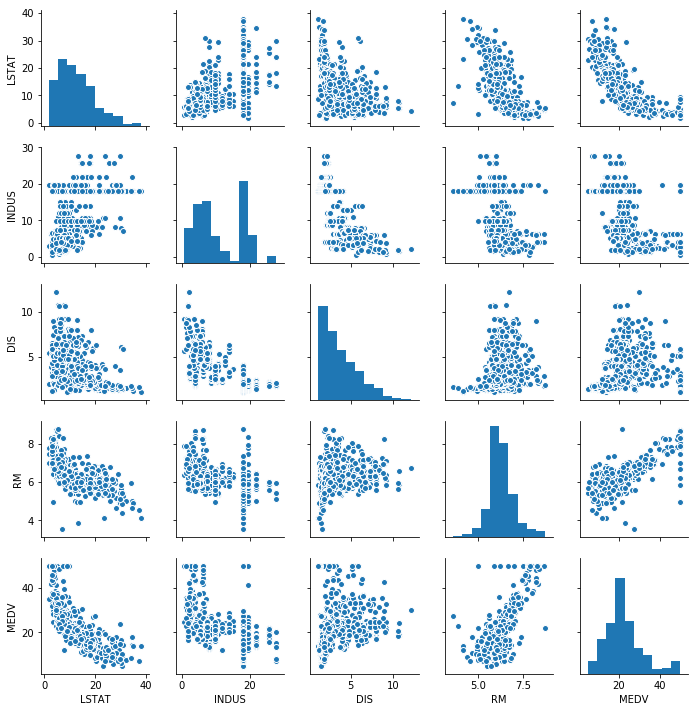

In [11]:
# 散布図行列を出力
# locメソッドで一部の特徴量だけをピックアップ
import seaborn as sns
sns.pairplot(df_pickup, size=2.0)
plt.show()

# 学習
今回は、**ホールド・アウト法**を用いて学習データとテストデータを分割します。  

ホールド・アウト法とは､データを訓練用（trainデータ）と検証用（testデータ）の2つに分割して学習させる方法です｡  
これによって､ある程度過学習を検出することができます｡  
訓練用とは｢学習に利用する｣という意味で､検証用とは｢学習には利用せずに､汎化性能を確認するためだけに利用する｣という意味です｡  
学習に利用しなければ､testデータはモデルにとっては初めて見るサンプルになるので､将来得られるサンプルと同様に見えるのです｡ 

<img src="images/hold_out.png" width="50%">

In [12]:
# 説明変数のデータを用意
# DataFrameの.valuesメソッドでarrayに変換できます
X = df.loc[:, ['LSTAT', 'RM']].values
X

array([[4.98 , 6.575],
       [9.14 , 6.421],
       [4.03 , 7.185],
       ...,
       [5.64 , 6.976],
       [6.48 , 6.794],
       [7.88 , 6.03 ]])

In [13]:
# testデータを用意
# DataFrameの.valuesメソッドでarrayに変換できます
y = df.loc[:, ['MEDV']].values

# どのように入っているか、最初の１０個を表示して確認
y[:10]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9]])

### ホールド・アウト法によるデータの分割

In [16]:
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
# データ全体のサンプル数を確認
print(X.shape)
print(y.shape)

(506, 2)
(506, 1)


In [18]:
# trainデータのサンプル数を確認
print(X_train.shape)
print(y_train.shape)

(354, 2)
(354, 1)


In [19]:
# testデータのサンプル数を確認
print(X_test.shape)
print(y_test.shape)

(152, 2)
(152, 1)


### 学習

In [21]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [22]:
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 性能の評価
学習を終えたら､学習させたモデルがどの程度信頼できるものなのか確かめなくてはなりません。    
評価の方法には沢山のものがありますが、ここでは**自由度調整済み決定係数**を用いた性能評価をしようと思います。  

まず**決定係数**とは､重回帰モデルの当てはまりの良さを表す指標です｡score()メソッドで出力できます｡  
ここで言う｢当てはまりの良さ｣とは､得られた超平面が特徴空間内に存在するデータ点にどれだけ沿ったものになっているかという指標です｡  
当てはまりの良さは予測の精度に直結しますので､決定係数をチェックすることで､モデルの予測性能を数値で評価することができます｡  
通常､  0〜1  の値を取り､ 1  に近いほど当てはまりが良く､ 0  に近いほど当てはまりが悪いということを意味します (全く当てはまりが良くないと､マイナスの値を取ることもあります)｡   

**自由度調整済み決定係数**とは､決定係数の改良版です｡  
実は､決定係数には予測の役に立たない変数を追加していくと､数値が意味もなく大きくなっていってしまうという欠点があり､それを改善しています｡  
scikit-learnには収録されていませんので､簡単に関数を定義しました｡   
特別な理由がない限りは､こちらを参考にする方が望ましいです｡評価の目安は決定係数と同様です｡
  
評価目安としては、  
0.9以上：非常に当てはまりが良い  
0.7以上：当てはまりが良い  
0.5以上：当てはまりがよくない
0.5未満：当てはまりが悪い

となります。

In [23]:
# 決定係数をtrainとtestに分けて出力
# 過学習しているかどうかを確認
print('R^2')
print('train: %.3f' % lr.score(X_train, y_train))
print('test : %.3f' % lr.score(X_test, y_test))

R^2
train: 0.651
test : 0.607


決定係数を見ると､学習させたモデルはあまり当てはまりが良いとは言えなさそうです。 

何か当てはまりを悪くする原因があったのでしょうか｡調べていく必要がありそうです｡  
また､testデータの方が若干小さくなっているので､やや過学習の傾向もありそうです｡

# 精度をあげる
今回は過学習が精度が上がらなかった問題だと思われる。  
過学習について自分で調べてみるのんが良いだろう。  
**標準化重回帰分析**なども良い手法だろう。